In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
X = df.iloc[:,1:6]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Label Replace

In [9]:
df = df.replace(to_replace = 'Iris-setosa',value=0)
df = df.replace(to_replace = 'Iris-versicolor',value=1)
df = df.replace(to_replace = 'Iris-virginica',value=2)

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [13]:
X= df.iloc[:,1:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y = df.iloc[:,-1:]
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


# Data Splitting

In [15]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

# Using gini-index

In [16]:
giniindex = DecisionTreeClassifier(criterion='gini',max_depth = 5,min_samples_leaf=3,random_state=100)

In [17]:
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [18]:
y_pred = giniindex.predict(X_test)

In [19]:
con_mat = confusion_matrix(Y_test,y_pred)
con_mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [20]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Using Entropy

In [21]:
entropy_deci = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,min_samples_leaf = 3, random_state = 100)

In [22]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [23]:
y_pred = entropy_deci.predict(X_test)

In [24]:
con_mat = confusion_matrix(Y_test,y_pred)
con_mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [25]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Gini Index Tree

In [26]:
from sklearn import tree

[Text(106.52727272727273, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(76.0909090909091, 152.208, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(136.96363636363637, 152.208, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(60.872727272727275, 108.72, 'X[0] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(30.436363636363637, 65.232, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(91.30909090909091, 65.232, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(213.05454545454546, 108.72, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(152.1818181818182, 65.232, 'X[2] <= 5.05\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(121.74545454545455, 21.744, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(182.61818181818182, 21.744, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(273.92727272727274, 65.232, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 3

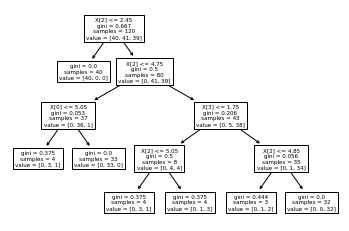

In [27]:
tree.plot_tree(giniindex)

[Text(106.52727272727273, 195.696, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(76.0909090909091, 152.208, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(136.96363636363637, 152.208, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(60.872727272727275, 108.72, 'X[0] <= 5.05\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(30.436363636363637, 65.232, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(91.30909090909091, 65.232, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(213.05454545454546, 108.72, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(152.1818181818182, 65.232, 'X[2] <= 5.05\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(121.74545454545455, 21.744, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(182.61818181818182, 21.744, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(273.92727272727274, 65.232, 'X[2] <= 4.85\nentropy = 0.18

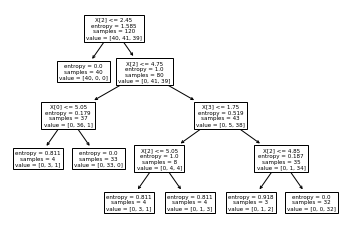

In [28]:
tree.plot_tree(entropy_deci)